In [94]:
#Import all the essential libraries 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import Adam
#load mnist dataset and split it into training and test set

(x_train, y_train), (x_test, y_test) = mnist.load_data() 
print('x_train shape:', x_train.shape) 
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


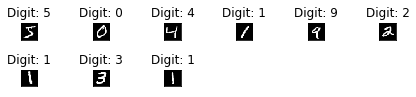

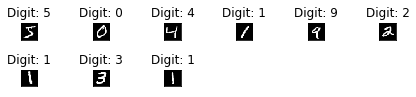

In [87]:

import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(6,6,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [88]:
#reshaping the dataset 

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# converting to float 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes 
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train=', x_train.shape[0])
print('Number of images in x_test=', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train= 60000
Number of images in x_test= 10000


In [89]:

#selecting 10 categories
num_category = 10
# convert class vectors to binary class matrices
y_train =keras.utils.to_categorical(y_train, num_category)
y_test =keras.utils.to_categorical(y_test, num_category)

In [90]:
##model building

#creating a model with stack of layers
model = Sequential()
#convolutional layer with rectified linear unit activation
#number of filters-32 with size=3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))

#number of filters-64 with size=3x3
model.add(Conv2D(64, (3, 3), activation='relu'))

#MaxPooling
model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))


model.add(Dropout(0.25))

#flatten sfor classification output
model.add(Flatten())

#fully connected layer
model.add(Dense(128, activation='relu'))

 
model.add(Dropout(0.5))

#output a softmax 
model.add(Dense(num_category, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
average_pooling2d_5 (Average (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

In [91]:

model.compile(loss= keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [92]:
batch_size = 100
num_epoch = 5

model_log = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/5
600/600 [==============================] - 71s 119ms/step - loss: 0.2518 - accuracy: 0.9250 - val_loss: 0.0547 - val_accuracy: 0.9828
Epoch 2/5
600/600 [==============================] - 79s 132ms/step - loss: 0.0924 - accuracy: 0.9730 - val_loss: 0.0400 - val_accuracy: 0.9866
Epoch 3/5
600/600 [==============================] - 75s 125ms/step - loss: 0.0677 - accuracy: 0.9794 - val_loss: 0.0314 - val_accuracy: 0.9887
Epoch 4/5
600/600 [==============================] - 65s 109ms/step - loss: 0.0587 - accuracy: 0.9817 - val_loss: 0.0316 - val_accuracy: 0.9897
Epoch 5/5
600/600 [==============================] - 80s 134ms/step - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.0275 - val_accuracy: 0.9903


In [122]:
#Evaluating the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.030135755094032355
Test accuracy: 0.9904000163078308
